<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/GeneticAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos Genéticos**



**Algoritmos Genéticos (AG)** são baseados na abordagem evolucionária da IA, na qual métodos de evolução da população são usados ​​para obter uma solução ótima para um dado problema. Eles foram propostos em 1975 por **John Henry Holland**.

Os algoritmos genéticos são baseados nos seguintes conceitos:

- Soluções válidas para o problema podem ser representadas como **genes**
- O **crossover**, ou cruzamento, combina duas soluções para obter uma nova solução alternativa
- A **seleção** é usada para selecionar soluções mais otimizadas usando alguma função de **fitness** ou de custo
- **Mutações** são introduzidas para desestabilizar a otimização e desviando de soluções de mínimo local



Assim, para implementar um Algoritmo Genético, você precisa:

- Codificar as soluções do problemas usando **genes** $g ∈ Γ$
- Definir uma **função de fitness** (aptidão) sobre o conjunto de genes $f:Γ→ R$, com valores menores (ou menores) da função correspondendo a melhores soluções (é um problema de otimização).
- Definir o mecanismo de cruzamento para combinar dois genes (duas soluções) para obter uma nova solução válida $\textbf{crossover}:Γ2→ Γ$.
- Definir um mecanismo de mutação $\textbf{mutation}:Γ→Γ$​​​​​ que altera ligeiramente algumas das soluções iniciais. Em geral, o cruzamento e mutação são algoritmos bastante simples que manipulam os "genes" representados em sequências numéricas ou vetores de bits, como a concatenação de partes de uma solução, alteração de um percentual da cadeia etc.



## `Pseudo`

A implementação específica de um algoritmo genético pode variar de caso para caso, mas sua estrutura geral é dada por:

1. Crie uma **População Inicial** $G ⊂ Γ$ de soluções
2. **Avaliação**, *Evaluation*
> Calcule a função de Fitness dos indivíduos (as soluções).
3. **Seleção**, Selection
> Selecione os indivíduos (soluções) mais aptos que serão empregados no Crossover $G' ⊂ Γ$.
4. **Cruzamento**, Crossover
> Selecione aleatoriamente duas soluções $g_1,g_2 ∈ G'$,  calcule $g= \mathrm{xover}(​​​g_1,g_2)$ criando a nova geração $G''$
5. **Mutação**, Mutation
> selecione indivíduos aleatórios $ g∈ G''$ e substitua por $\mathrm{mutation}(g)$.
6. **Nova geração**, Replacement
> Substitua parte ou totalmente a geração anterior pela atual.

7. **Repita** a partir do passo 2, até obters um valor suficientemente pequeno de $fit$​, ou até que um limite do número de gerações seja atingido.


Diversas variantes podem ser criadas, como diferentes percentuais e esquemas criação de novos indíviduos, taxa de mortalidade, taxas de mutação etc.

> **SUGIRA ALGUMAS VOCÊ!**



<p>
  <img src="https://user-images.githubusercontent.com/16560492/220486073-c5b6089d-81e4-44d9-a53c-385f479a7273.jpg" width="50%" align="center"/>
</p>

## Tipos de Problemas

Alguns tipos de problemas normalmente resolvidos pelo GA envolvem:

- Problemas de Otimização em Geral
  - Logística, transporte
  - Cronogramas
  - Alocação de recursos
  - Otimização de cateiras
  - Otimização multiobjetivo
- Embalagem ótima
- Corte ótimo
- Problemas de busca exaustiva

# Exemplo: Divisão Justa  

Considere vários pacotes de mercadoria de diferentes valores e suponha que você deseje dividir igualmente essas mercadorias de forma que a diferença, entre os dois conjuntos seja mínimo.




## Formalizando o problema

O conjunto de valores $S$ precisa ser dividido em dois subconjuntos $S_1$ e $S_2$, de modo que

$$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$

e $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.



In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [7]:
N = 18      # troque aqui por 100, ou mais
S = np.array([random.randint(1,1000) for _ in range(N)])
print(S)

[  7 768 562 803  40 335 385 268 961 703 314 863 245  99 838 794 862 882]


## Solução inicial em *genes*

Vamos codificar cada solução possível do problema por um vetor binário $B ∈ { 0,1}$ onde o $i$-ésimo número mostra se o $i$-ésimo elemento do conjunto original S pertence a $S_1$ (`TRUE`) ou $S_2$ (`FALSE`).

In [17]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

B = generate(S)
print(B)

[0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0]


In [12]:
S, B*S, (1-B)*S

(array([  7, 768, 562, 803,  40, 335, 385, 268, 961, 703, 314, 863, 245,
         99, 838, 794, 862, 882]),
 array([  7,   0, 562, 803,   0, 335,   0,   0,   0, 703,   0, 863, 245,
          0, 838,   0,   0, 882]),
 array([  0, 768,   0,   0,  40,   0, 385, 268, 961,   0, 314,   0,   0,
         99,   0, 794, 862,   0]))

## Função de *Fitness*

O "custo" da solução será a diferença entre a soma ou dois conjuntos, $S_1$ e $S_2$, que queremos minimizar.

In [14]:
def fitness(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fitness(B)

np.int64(747)

## *Crossover*

Para o crossover, pegaremos alguns bits de um vetor e alguns bits de outro. Usaremos a mesma função `generate()` para selecionar aleatoriamente quais bits pegar de qual das máscaras de entrada.

In [15]:
def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

In [18]:
b1 = generate(S)
b2 = generate(S)

b1, b2, xover(b1,b2)



(array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]))

## Mutação

Selecionaremos um bit aleatório e o negaremos (mudaremos de 0 para 1 e vice-versa).

In [16]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x


In [19]:
b1, mutate(b1)

(array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]))

## População Inicial de Soluções

Vamos criar uma população inicial de soluções $P$.

In [20]:
pop_size = 30 # tamanho da população
P = [generate(S) for _ in range(pop_size)]

## Evolução

Fazemos agora a evolução de novas gerações da população inicial. A cada geração, realizamos uma mutação com a probabilidade de 30% e substituímos o elemento com a pior função fitness pelo elemento mutado. Com probabilidade de 70% realizamos crossover. A função retorna a melhor solução (gene correspondente à melhor solução) e o histórico da função de ajuste mínimo na população em cada iteração.

In [27]:
def evolve(P,S=S,n=200):
    res = []
    for _ in range(n):

        f = min([fitness(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fitness(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fitness(b)<fitness(P[i]):
                P[i]=b
            elif fitness(b)<fitness(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fitness(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fitness(s))

[0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0] 5


## Histórico

Você pode ver que conseguimos minimizar a função de Fitness e, abaixo, pode ver como cada população se comporta durante o processo.

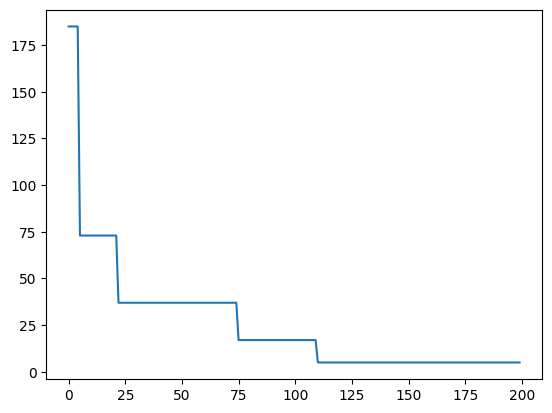

In [28]:
plt.plot(hist)
plt.show()

# **`PyGAD`**

In [33]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.5 MB/s eta 0:00:00


## Otimizando uma Função Linear

/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


Generation = 1
Fitness    = 0.2036435746342095
Change     = 0.2036435746342095
Generation = 2
Fitness    = 1.2645499438167829
Change     = 1.0609063691825733
Generation = 3
Fitness    = 9.838732002576041
Change     = 8.574182058759257
Generation = 4
Fitness    = 9.838732002576041
Change     = 0.0
Generation = 5
Fitness    = 27.4039324755486
Change     = 17.56520047297256
Generation = 6
Fitness    = 46.449214433293385
Change     = 19.045281957744784
Generation = 7
Fitness    = 63.8487031800491
Change     = 17.399488746755715
Generation = 8
Fitness    = 63.8487031800491
Change     = 0.0
Generation = 9
Fitness    = 63.8487031800491
Change     = 0.0
Generation = 10
Fitness    = 63.8487031800491
Change     = 0.0
Generation = 11
Fitness    = 63.8487031800491
Change     = 0.0
Generation = 12
Fitness    = 63.8487031800491
Change     = 0.0
Generation = 13
Fitness    = 63.8487031800491
Change     = 0.0
Generation = 14
Fitness    = 63.8487031800491
Change     = 0.0
Generation = 15
Fitness    = 63

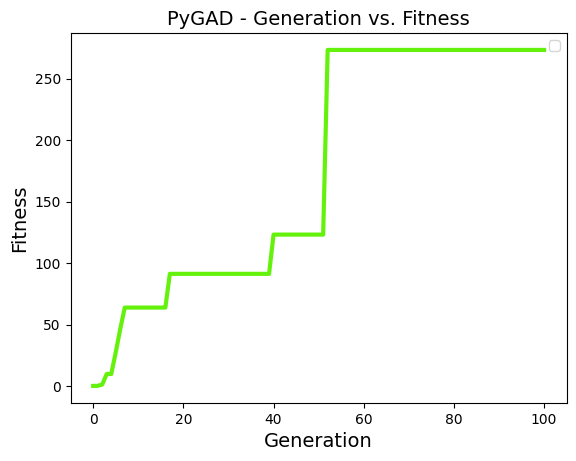

Parameters of the best solution : [ 2.7652844   6.44575941  5.5109065   1.46860399 -1.52217684 -0.52317022]
Fitness value of the best solution = 273.38842598188336
Index of the best solution : 0
Predicted output based on the best solution : 44.00365679932493
Best fitness value reached after 52 generations.


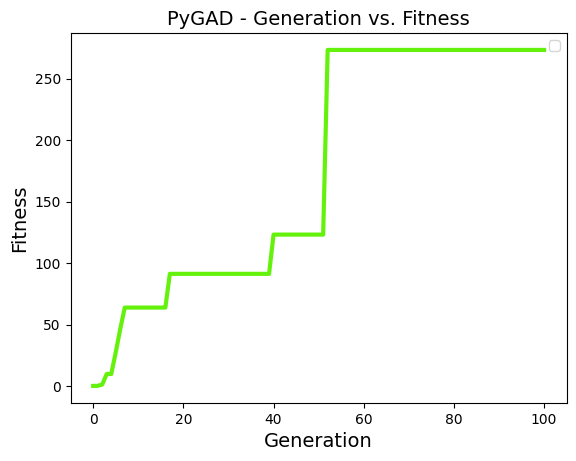

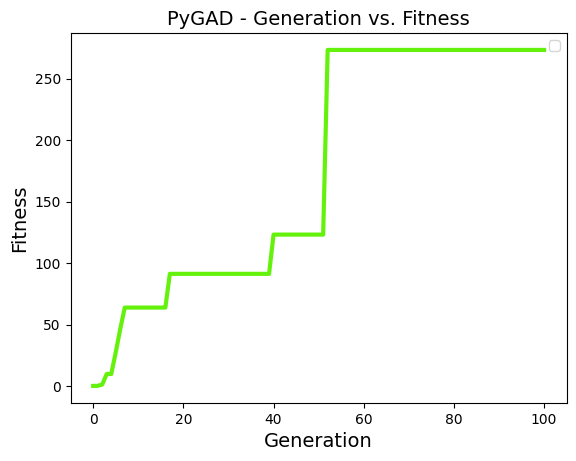

In [ ]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

## Otimizando uma Função não Linear

$$ f(x,y) = 4 x^2 - 2 y^2 = 1$$

Generation = 1
Fitness    = 9.873294767934635
Change     = 9.873294767934635
Generation = 2
Fitness    = 16.569814682515574
Change     = 6.696519914580939
Generation = 3
Fitness    = 16.569814682515574
Change     = 0.0
Generation = 4
Fitness    = 16.569814682515574
Change     = 0.0
Generation = 5
Fitness    = 534.8117560597024
Change     = 518.2419413771868
Generation = 6
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 7
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 8
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 9
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 10
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 11
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 12
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 13
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 14
Fitness    = 534.8117560597024
Change     = 0.0
Generation = 15
Fitness    = 534.8117560597024
Change     = 0.0
Gene

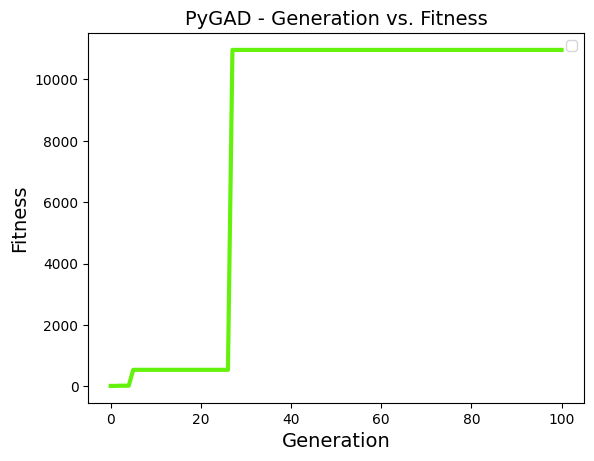

Parameters of the best solution : [-0.51650358 -0.18329485]
Fitness value of the best solution = 10963.669422447987
Index of the best solution : 0
Predicted output based on the best solution : -1.6994246200965586
Best fitness value reached after 27 generations.


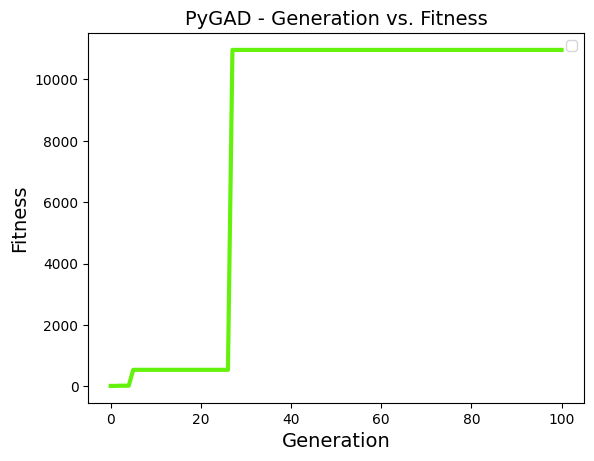

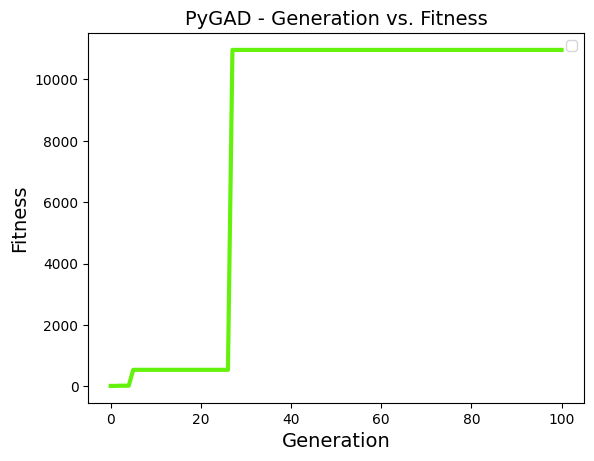

In [40]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w2) = w1^2 x1 + w2^2 x2 where (x1,x2)=(4,-2) and y=1
What are the best values for the 2 weights (w1 to w2)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2] # Function inputs.
desired_output = 1 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(np.power(solution,2)*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

In [41]:
solution = [-0.51650358 -0.18329485]

numpy.sum(np.power(solution,2)*function_inputs)

np.float64(0.9794356852609297)

# Exercício

Atividade em grupo, máx 5 alunos. Escolha apenas 1 dentre os problemas abaixo para implementar.

## Exercício A. Otimização multi-objetivo.

Crie um cenário/problema multi-objetivo original, por exemplo otimização de rendimento e risco, ou maior número de empregados e menor remuneração etc., **descreva esse seu cenário/problema**, e em seguida siga o exemplo https://pygad.readthedocs.io/en/latest/pygad.html#linear-model-optimization-single-objective para implementar a sua solução com o pacote PyGAD. Discuta os seus resultados.

## Exercício B. Forca.

Implemente um algoritmo genético *by scratch* ou empregue o PyGDA para solucionar o jogo [Forca](https://pt.wikipedia.org/wiki/Jogo_da_forca). Em ambos os casos descreva a solução criada.

## **Entrega**

- **02.04** Entrega única



